# Masking tissue region in whole slide images
<a href="https://colab.research.google.com/github/TIA-Lab/tiatoolbox/blob/master/examples/03_example_tissuemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://kaggle.com/kernels/welcome?src=https://github.com/TIA-Lab/tiatoolbox/blob/master/examples/03_example_tissuemask.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/></a>

_In order to run this notebook on a Kaggle platform, 1) click on the blue Kaggle badge saying Open in Kaggle 2) click on Settings on the right of the Kaggle screen, 3) log in to your Kaggle account, 4) tick "Internet" checkbox under Settings, to enable necessary downloads._

# Welcome to tiatoolbox!

## About this notebook
This jupyter notebook can be run on any computer with a standard browser and no prior installation of any programming language is required. It can run remotely over the Internet, free of charge, thanks to Google Colaboratory or Kaggle. To connect with Colab or Kaggle, click on one of the two blue checkboxes above. Check that "colab" or "kaggle", as appropriate, appears in the address bar. You can right click on "Open in Colab" and select "Open in new tab" if left click does not work for you. Familiarize yourself with the drop-down menus near the top of the window. You can edit the notebook during the session, for example substituting your own image files for the image files used in this demo. Experiment by changing the parameters of functions. It is not possible for an ordinary user to permanently change this version of the notebook on Github, Colab or Kaggle, so you cannot inadvertently mess it up. Use the notebook's File Menu if you wish to save your own (changed) notebook.

To run the notebook on any platform, except for Colab or Kaggle, set up your Python environment, as explained in the 
[README](https://github.com/TIA-Lab/tiatoolbox/blob/master/README.md#install-python-package) file.

### About this demo
In this example, we will show how you can use tiatoolbox to easily find the tissue region in a whole slide image. Apart from tissue regions, WSIs usually show large blank (glass) background areas that contain no information. Therefore it is essential to detect the informative (tissue) region in the WSI before any action (like patch extraction and classification). We call this step, "tissue masking". In particular, we introduce the use of our module
`tissuemask`([details](https://github.com/TIA-Lab/tiatoolbox/blob/master/tiatoolbox/tools/tissuemask.py)) which distinguishes tissue from glass, using an automatic image thresholding algorithm ([Otsu's method](https://learnopencv.com/otsu-thresholding-with-opencv/)) and some morphological operations.

### Setting up the environment
You can skip this cell if 1) you are not using the Colab or Kaggle plaforms or 2) you are using Colab or Kaggle and this is not your first run of the notebook in the current session. If you nevertheless run the cell, you may get an error message, but no harm will be done. On Colab or Kaggle the cell installs `tiatoolbox`, and other prerequisite software. Harmless error messages should be ignored. Outside Colab or Kaggle, the notebook expects `tiatoolbox` to already be installed. (See the instructions in [README](https://github.com/TIA-Lab/tiatoolbox/blob/master/README.md#install-python-package).)

In [ ]:
!apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail --line 1
!pip install tiatoolbox | tail --line 1

print('Installation is done.')

This cell removes the directory`tmp`if it exists—a previous run may have created it. This cell can be skipped if you are running this notebook for the first time.

In [2]:
![ -d tmp ] && ( echo "deleting tmp directory"; rm -rf tmp )

### Importing related libraries
We will start by importing some libraries required to run this notebook.

In [3]:
from tiatoolbox.wsicore import wsireader
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 150 # for high resolution figure in notebook

ImportError: Couldn't locate OpenSlide dylib.  Is OpenSlide installed?

### Downloading the required files
We download, over the internet, a WSI for our experiment. Downloading is needed once in each Colab session.
> In Colab, if you click the files icon (see below) in the vertical toolbar on the left hand side then you can see all the files which the code in this notebook can access. The data will appear here when it is downloaded.
>
> 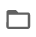
>
> *The 'files' icon*

In [ ]:
!wget http://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1-Small-Region.svs

# Reading a WSI and its Thumbnail
The toolbox provides a common interface for the many different whole slide image file formats prduced by different vendors. The functions wsireader.get_wsireader takes a file path as input and returns an instance of the appropriate subclass of WSIReader. For more information about WSI reading in tiatoolbox, please refer to the [documentation](https://tia-toolbox.readthedocs.io/en/latest/usage.html?highlight=WSIReader.read_rect#tiatoolbox.wsicore.wsireader) and the [notebook example](https://github.com/TIA-Lab/tiatoolbox/blob/master/examples/example_wsiread.ipynb) dedicated to this topic.

In [ ]:
wsi = wsireader.get_wsireader(
                input_img='CMU-1-Small-Region.svs')
print(type(wsi))

From the output of the cell above, note that the variable wsi is much more than just an WSI image. There are many associated functions that enable it to conveniently read parts of the image. First, let's check the basic WSI information, such as magnification, dimension, etc. (mpp= microns per pixel).

In [ ]:
wsi_info = wsi.info.as_dict()
# Print one item per line
print(*list(wsi_info.items()), sep='\n')

Working with `tiatoolbox`, it is easy to load a WSI thumbnail using the `slide_thumbnail` method of the `wsi` object. The thumbnail can be loaded using different units to indicate the resolution. The following options are available for the `units` argument:

- `mpp`: microns per pixel
- `power`: objective power of the scanner
- `level`: the level in the WSI pyramidal file
- `baseline`: pixels per baseline pixel

We will load (and show) the thumbnail at x1.25 objective power as follows:

In [ ]:
wsi_thumb = wsi.slide_thumbnail(resolution=1.25, units='power')
plt.imshow(wsi_thumb)
plt.axis('off')
plt.show()

# Generating tissue mask in 1 line of code
The task is to distinguish between tissue and glass (no tissue) in the WSI. We compute a mask, by which we mean a binary colouring of the pixels to either blue=glass or yellow=tissue. Generating the tissue mask for a WSI using tiatoolbox is as simple as the following line of code:

In [ ]:
mask = wsi.tissue_mask(resolution=1.25, units='power')

The two Python variables `mask` and `wsi` are both instances of the class `WSIReader`, and therefore have the same attributes, and can be treated in the same way. For example, we can see the original image and the mask next to each other at the same resolution and at the same size. Now, let's see the thumbnails of the original `wsi` and its `mask` at the same resolution.

In [ ]:
mask_thumb = mask.slide_thumbnail(resolution=1.25, units='power') #extracting the mask_thumb at the same resolution as wsi_thumb

# showing the result
def show_side_by_side (img1, img2):
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.axis('off')
    plt.show()
show_side_by_side (wsi_thumb, mask_thumb)

As you can see, the generated mask resembles the tissue area of the original WSI pretty well. This kind of mask is usually used in digital pathology pipelines to specify the regions from which to extract patches at high resolution. Besides extracting thumbnail, we can also extract regions from the `mask` object as we do for `wsi`:


In [ ]:
wsi_region = wsi.read_region(location=(1024, 512), level=0, size=(512, 512))
mask_region = mask.read_region(location=(1024, 512), level=0, size=(512, 512))

show_side_by_side (wsi_region, mask_region)

As expected, the coordinates of the original `wsi` and the `mask` line up precisely. This can be particularly useful if you want to calculate statistics of the tissue region in a patch (e.g., tissue area, intensity, and texture information).

Furthermore, there are some options (arguments) that can be used when calling `tissue_mask()` to achieve a more detailed tissue mask in high resolution or to remove small objects from the tissue mask. This will be explained in the next section.


# Generating tissue mask in from images in batch
Utilizing the functionalities in the `tissuemask` tool of the tiatoolbox, we can extract tissue masks for a batch of images. Here we use `MorphologicalMasker` to generate tissue masks for a list of input image regions.

First, we extract two different regions from the `wsi`. This is ourbatch of (only two) images to be processed (using [`wsi.read_rect`](https://tia-toolbox.readthedocs.io/en/latest/usage.html?highlight=read_rect#tiatoolbox.dataloader.wsireader.WSIReader.read_rect). We then we instantiate a `MorphologicalMasker` object to be used in a later cell for extraction of masks from the batch:

In [ ]:
from tiatoolbox.tools.tissuemask import MorphologicalMasker

# extracting the regions
mag_power = 20 # magnification power to extract patches from and calculate the kernel_size based on
region1 = wsi.read_rect(location=(1024, 256), size=(512, 512), resolution=mag_power, units='power')
region2 = wsi.read_rect(location=(1536, 2048), size=(512, 512), resolution=mag_power, units='power')

# instantiating a MorphologicalMasker
masker = MorphologicalMasker(power=mag_power)

Now, let's apply the `masker` on the extracted patches:

In [ ]:
masks = masker.fit_transform([region1, region2])

# showing the results
show_side_by_side (region1, masks[0])
show_side_by_side (region2, masks[1])

What `fit_transform` does is to find the optimal threshold using Otsu's method and then to post-process the initial mask by deleting small objects and applying morphological dilation. Due to the dilation operation, the detected tissue mask deliberately overflows the real boundaries of tissue regions because we don't want to miss any tissue information.

You may have noticed that in the `fit_transform` function we put the inputs into square brackets, i.e. `masker.fit_transform([region1, region2])`. The `fit_transform` function accepts a list of RGB images or a numpy array in the expected shape of NxHxWxC (number images, height, width, channels), and outputs a list of tissue masks


`MorphologicalMasker` can be used with different __optional__ arguments: 

- `kernel_size`: Size of the elliptical kernel to be used for morphological operations in mask post-processing.
- `mpp`: The microns per pixel of the image to be masked. Used to calculate `kernel_size`.
- `power`: The objective power of the image to be masked. Used to calculate `kernel_size`.
- `min_region_size`: Minimum region size in pixels to consider as foreground.

_Please note_ that only one of the named arguments `kernel_size`, `mpp`, or `power` should be used. Only the `kernel_size` is needed in morphological operations; the other two possible arguments are used only to calculate a suitable `kernel_size`.
More information can be found in the definition of [tissuemask](https://github.com/TIA-Lab/tiatoolbox/blob/master/tiatoolbox/tools/tissuemask.py) definition. 


Next we compute the mask of `wsi_thumb` using `MorphologicalMasker` and investigate the effect of changing its parameters on the outputs:

In [ ]:
def make_subplot(img, title, k):
    plt.subplot(1,5,k)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 5})

# default: kernel_size=1, min_region_size=1
masker = MorphologicalMasker() 
masks_default = masker.fit_transform([wsi_thumb])

# kernel_size=1, min_region_size=30
# meaning deleting objects smaller than 30 pixels in area
masker = MorphologicalMasker(min_region_size=30) 
masks_small = masker.fit_transform([wsi_thumb])

# kernel_size=5
# applying morphological dilation with a eleptical kernel (r=5) and
# deleting objects smaller than pi*5^2=78 pixels in area
masker = MorphologicalMasker(kernel_size=5) 
masks_opt = masker.fit_transform([wsi_thumb])

# power=20
# resulting to a over estimated kernel_size, hence bigger mask
masker = MorphologicalMasker(power=20) 
masks_big = masker.fit_transform([wsi_thumb])

# showing the result
make_subplot(wsi_thumb, 'Thumbnail', 1)
make_subplot(masks_default[0], 'Default mask', 2)
make_subplot(masks_small[0], 'Setting min_region_size=30', 3)
make_subplot(masks_opt[0], 'Setting kernel_size=5', 4)
make_subplot(masks_big[0], 'Setting power=20', 5)

plt.show()

As you can see, changing the parameters can change the resulted mask considerably. But don't worry! Normally you don't need to change or set anything when you are working with WSIs in tiatoolbox. Just use the default values of functions and the toolbox tries to find the best parameters for your input WSI (as we did when we called `mask = wsi.tissue_mask()`). 

Now, feel free to try these functionalities on your data, or change the parameters to see how they can affect the output mask.